L1 and L2 regression
- How to add Lasso and Regression to your Linear Regression model
- Finding Lambda

In [12]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [4]:
wine = load_wine()
data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [83]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [6]:
X=data.drop('target',axis=1)
y=data['target']

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

Xtrain_scaled = ss.fit_transform(Xtrain)
Xtest_scaled = ss.transform(Xtest)

In [45]:
linreg = LinearRegression()
linreg.fit(Xtrain, ytrain)

ypred = linreg.predict(Xtest)

print('Training r^2:', linreg.score(Xtrain, ytrain))
print('Test r^2:', linreg.score(Xtest, ytest))
print('Training MSE:', mean_squared_error(ytrain, linreg.predict(Xtrain)))
print('Test MSE:', mean_squared_error(ytest, linreg.predict(Xtest)))

Training r^2: 0.9025573520515205
Test r^2: 0.882961220024991
Training MSE: 0.05920705410991339
Test MSE: 0.06554171678600501


In [67]:
lasso = Lasso(alpha=.0029) # Lasso is also known as the L1 norm 
lasso.fit(Xtrain, ytrain)

print('Training r^2:', lasso.score(Xtrain, ytrain))
print('Test r^2:', lasso.score(Xtest, ytest))
print('Training MSE:', mean_squared_error(ytrain, lasso.predict(Xtrain)))
print('Test MSE:', mean_squared_error(ytest, lasso.predict(Xtest)))

Training r^2: 0.9000707437986937
Test r^2: 0.8855465863855054
Training MSE: 0.06071794028218901
Test MSE: 0.06409391162411697


In [82]:
ridge = Ridge(alpha=1.151) # Ridge is also known as the L2 norm
ridge.fit(Xtrain, ytrain)

print('Training r^2:', ridge.score(Xtrain, ytrain))
print('Test r^2:', ridge.score(Xtest, ytest))
print('Training MSE:', mean_squared_error(ytrain, ridge.predict(Xtrain)))
print('Test MSE:', mean_squared_error(ytest, ridge.predict(Xtest)))

Training r^2: 0.9013901858528132
Test r^2: 0.8877695503425603
Training MSE: 0.05991623508700122
Test MSE: 0.06284905180816619


In [71]:
train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, .01, num=100):
    lasso = Lasso(alpha=alpha)
    lasso.fit(Xtrain, ytrain)
    
    train_preds = lasso.predict(Xtrain)
    train_mse.append(mean_squared_error(ytrain, train_preds))
    
    test_preds = lasso.predict(Xtest)
    test_mse.append(mean_squared_error(ytest, test_preds))
    
    alphas.append(alpha)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.93726909830925, tolerance: 0.008081203007518797
  positive)


Optimal Alpha Value: 0.002929292929292929


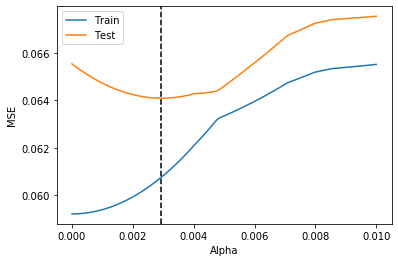

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {float(optimal_alpha)}')

In [80]:
train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 10, num=1000):
    ridge = Ridge(alpha=alpha)
    ridge.fit(Xtrain, ytrain)
    
    train_preds = ridge.predict(Xtrain)
    train_mse.append(mean_squared_error(ytrain, train_preds))
    
    test_preds = ridge.predict(Xtest)
    test_mse.append(mean_squared_error(ytest, test_preds))
    
    alphas.append(alpha)

Optimal Alpha Value: 1.5115115115115114


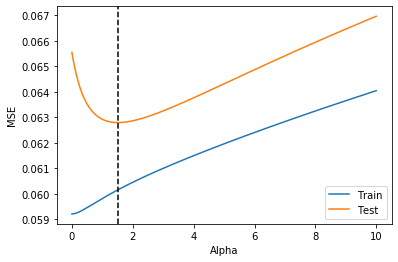

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {float(optimal_alpha)}')